<a href="https://colab.research.google.com/github/Sirfowahid/DL_Project_01/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
from sklearn.model_selection import train_test_split
display.set_matplotlib_formats('svg')

In [3]:
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

labels = data[:,0]
data = data[:,1:]

data.shape,labels.shape

((20000, 784), (20000,))

In [4]:
labels

array([6., 5., 7., ..., 2., 9., 5.])

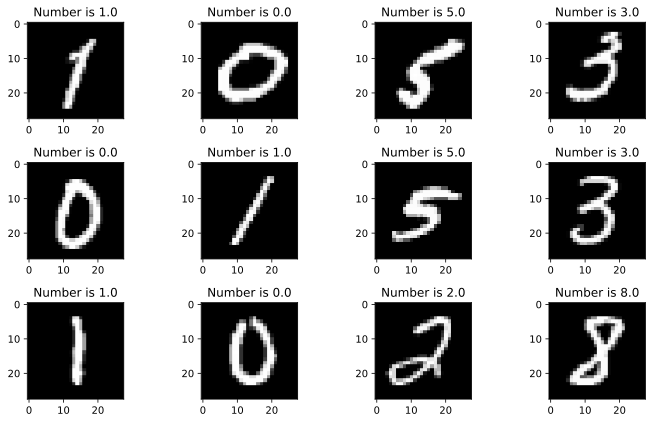

In [5]:
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten():
  index = np.random.randint(low=0,high=data.shape[0])
  img = np.reshape(data[index,:],(28,28))
  ax.imshow(img,cmap='gray')
  ax.set_title(f'Number is {labels[index]}')
plt.tight_layout()
plt.show()

In [6]:
dataT = torch.tensor(data/np.max(data)).float()
labelsT = torch.tensor(labels).long()

dataT.max()


tensor(1.)

In [7]:
train_data,test_data,train_labels,test_labels = train_test_split(dataT,labelsT,test_size=.1)

train_dataset = TensorDataset(train_data,train_labels)
test_dataset = TensorDataset(test_data,test_labels)

batchsize = 32
train_loader = DataLoader(train_dataset,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader = DataLoader(test_dataset,batch_size=test_dataset.tensors[0].shape[0])

In [8]:
def createClassifier():
  class classifierNetwork(nn.Module):
    def __init__(self):
      super().__init__()
      self.input = nn.Linear(784,256)
      self.fc1 = nn.Linear(256,128)
      self.fc2 = nn.Linear(128,64)
      self.fc3 = nn.Linear(64,32)
      self.output = nn.Linear(32,10)

    def forward(self,x):
      x = F.relu(self.input(x))
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      return self.output(x)
  
  classifier = classifierNetwork()
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(classifier.parameters(),lr=0.01)

  return classifier,lossfun,optimizer

In [9]:
def trainClassifierNetwork():

  classifier,lossfun,optimizer = createClassifier()

  numepochs = 30
  trainAcc = []
  testAcc = []
  losses = torch.zeros(numepochs,2)

  for epochi in range(numepochs):

    batchLoss = []
    batchAcc = []

    for X,y in train_loader:

      yHat = classifier(X)
      loss = lossfun(yHat,y)
      batchLoss.append(loss.item())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))
    
    losses[epochi,0] = np.mean(batchLoss)
    trainAcc.append(np.mean(batchAcc))
    
    X,y = next(iter(test_loader))
    with torch.no_grad():
      yHat = classifier(X)
      loss = lossfun(yHat,y)
      losses[epochi,1] = loss.item()
    
    testAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))

  return classifier,losses,trainAcc,testAcc


In [10]:
classifier,losses,trainAcc,testAcc = trainClassifierNetwork()

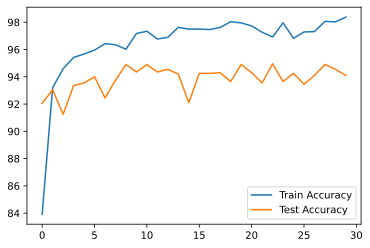

In [11]:
plt.plot(trainAcc)
plt.plot(testAcc)
plt.legend(['Train Accuracy','Test Accuracy'])
plt.show()

In [1]:
def createClassifier():
  class classifierNetwork(nn.Module):
    def __init__(self):
      super().__init__()
      self.input = nn.Linear(784,128)
      self.fc1 = nn.Linear(128,64)
      self.fc2 = nn.Linear(64,32)
      self.output = nn.Linear(32,10)

    def forward(self,x):
      x = F.relu(self.input(x))
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      return self.output(x)
  
  classifier = classifierNetwork()
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(classifier.parameters(),lr=0.001)

  return classifier,lossfun,optimizer

In [12]:
def trainClassifierNetwork():

  classifier,lossfun,optimizer = createClassifier()

  numepochs = 30
  trainAcc = []
  testAcc = []
  losses = torch.zeros(numepochs,2)

  for epochi in range(numepochs):

    batchLoss = []
    batchAcc = []

    for X,y in train_loader:

      yHat = classifier(X)
      loss = lossfun(yHat,y)
      batchLoss.append(loss.item())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))
    
    losses[epochi,0] = np.mean(batchLoss)
    trainAcc.append(np.mean(batchAcc))
    
    X,y = next(iter(test_loader))
    with torch.no_grad():
      yHat = classifier(X)
      loss = lossfun(yHat,y)
      losses[epochi,1] = loss.item()
    
    testAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))

  return classifier,losses,trainAcc,testAcc


In [13]:
classifier,losses,trainAcc,testAcc = trainClassifierNetwork()

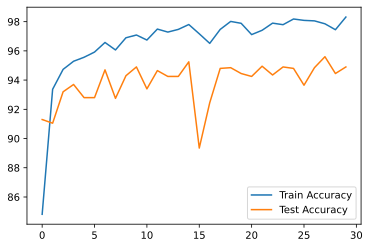

In [14]:
plt.plot(trainAcc)
plt.plot(testAcc)
plt.legend(['Train Accuracy','Test Accuracy'])
plt.show()

In [ ]:
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten():
  index = np.random.randint(low=0,high=data.shape[0])
  
  img = np.reshape(data[index,:],(28,28))
  ax.imshow(img,cmap='gray')
  ax.set_title(f'Number is {labels[index]}')
plt.tight_layout()
plt.show()

In [15]:
X,y = next(iter(test_loader))
predictions = classifier(X).detach()

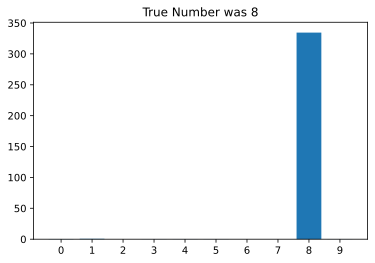

In [20]:
RandomSelectionRange = 100
plt.bar(range(10),np.exp(predictions[RandomSelectionRange]))
plt.xticks(range(10))
plt.title(f'True Number was {y[RandomSelectionRange].item()}')
plt.show()